##MODEL DEFINITION
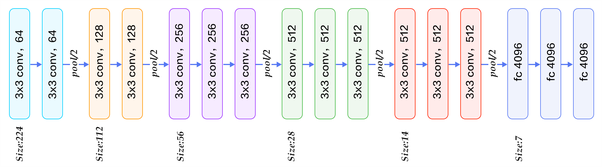

In [1]:
from keras.datasets import cifar100
(x_train, Y_train), (x_test, Y_test) = cifar100.load_data()
#x_train = x_train / 255
#x_test = x_test/ 255
from keras.utils import to_categorical
y_train = to_categorical(Y_train)
y_test = to_categorical(Y_test)

169009152/169001437 [==============================] - 6s 0us/step


In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense,BatchNormalization,Activation,Dropout,LeakyReLU
from tensorflow.keras.optimizers import Adam
model = Sequential()

# Creating first block- (2 Convolution + 1 Max pool)
model.add(Conv2D(filters= 64, kernel_size= (3,3), strides= (1,1), padding='same', input_shape= (32, 32, 3)))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(filters= 64, kernel_size= (3,3), strides= (1,1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size= (2,2), strides=(1,1)))

# Creating second block- (2 Convolution + 1 Max pool)
model.add(Conv2D(filters= 128, kernel_size= (3,3), strides= (1,1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(filters= 128, kernel_size= (3,3), strides= (1,1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size= (2,2), strides=(1,1)))


# Creating third block- (3 Convolution + 1 Max pool)
model.add(Conv2D(filters= 256, kernel_size= (3,3), strides= (1,1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(filters= 256, kernel_size= (3,3), strides= (1,1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(filters= 256, kernel_size= (3,3), strides= (1,1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size= (2,2), strides=(1,1)))

# Creating fourth block- (3 Convolution + 1 Max pool)
model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
#model.add(Dropout(0.3))
model.add(MaxPool2D(pool_size= (2,2), strides=(2,2)))

# Creating fifth block- (3 Convolution + 1 Max pool)
model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
#model.add(Dropout(0.3))
model.add(MaxPool2D(pool_size= (2,2), strides=(2,2)))

# Flattening the pooled image pixels
model.add(Flatten())

# Creating 2 Dense Layers
model.add(Dense(units= 512))
model.add(LeakyReLU(alpha=0.1))

model.add(Dense(units= 512))
model.add(LeakyReLU(alpha=0.1))
#model.add(Dropout(0.3))
# Creating an output layer
model.add(Dense(units= 100, activation='softmax'))
adam=Adam(learning_rate=0.0001,clipnorm=1,name='adam')
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
#print(model.summary())

Code snippet taken and modified from https://towardsdatascience.com/step-by-step-vgg16-implementation-in-keras-for-beginners-a833c686ae6c

FITTING

In [3]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("VGG_NoReg_Adam.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=1, mode='auto',restore_best_weights=True)
hist=model.fit(x_train, y_train, batch_size=128, epochs=50, verbose=1, validation_data=(x_test, y_test),callbacks=[checkpoint,early])


Epoch 1/50
391/391 [==============================] - ETA: 0s - loss: 3.8914 - accuracy: 0.1130
Epoch 00001: val_accuracy improved from -inf to 0.21780, saving model to VGG_NoReg_Adam.hdf5
391/391 [==============================] - 314s 802ms/step - loss: 3.8914 - accuracy: 0.1130 - val_loss: 3.2974 - val_accuracy: 0.2178
Epoch 2/50
391/391 [==============================] - ETA: 0s - loss: 2.9663 - accuracy: 0.2801
Epoch 00002: val_accuracy improved from 0.21780 to 0.32050, saving model to VGG_NoReg_Adam.hdf5
391/391 [==============================] - 314s 803ms/step - loss: 2.9663 - accuracy: 0.2801 - val_loss: 2.7641 - val_accuracy: 0.3205
Epoch 3/50
391/391 [==============================] - ETA: 0s - loss: 2.3503 - accuracy: 0.4050
Epoch 00003: val_accuracy improved from 0.32050 to 0.37950, saving model to VGG_NoReg_Adam.hdf5
391/391 [==============================] - 314s 803ms/step - loss: 2.3503 - accuracy: 0.4050 - val_loss: 2.5367 - val_accuracy: 0.3795
Epoch 4/50
391/391 [==

In [4]:

# Test the model
y_true = y_test.argmax(-1)
y_pred = model.predict(x_test).argmax(-1)
# generate confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
confusion_matrix(y_true, y_pred)
# calculate prec, recall, accuracy
print("Prec: "+ str(precision_score(y_true, y_pred, average='weighted')))
print("Recall: "+ str(recall_score(y_true, y_pred, average='weighted')))
print("Accuracy: " + str(accuracy_score(y_true, y_pred)))

Prec: 0.4189169464812365
Recall: 0.4071
Accuracy: 0.4071


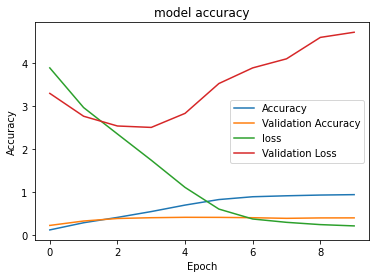

In [5]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

## Cell to Load Weights and Print Results

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense,BatchNormalization,Activation,Dropout,LeakyReLU
from tensorflow.keras.optimizers import Adam
model = Sequential()

# Creating first block- (2 Convolution + 1 Max pool)
model.add(Conv2D(filters= 64, kernel_size= (3,3), strides= (1,1), padding='same', input_shape= (32, 32, 3)))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(filters= 64, kernel_size= (3,3), strides= (1,1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size= (2,2), strides=(1,1)))

# Creating second block- (2 Convolution + 1 Max pool)
model.add(Conv2D(filters= 128, kernel_size= (3,3), strides= (1,1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(filters= 128, kernel_size= (3,3), strides= (1,1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size= (2,2), strides=(1,1)))


# Creating third block- (3 Convolution + 1 Max pool)
model.add(Conv2D(filters= 256, kernel_size= (3,3), strides= (1,1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(filters= 256, kernel_size= (3,3), strides= (1,1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(filters= 256, kernel_size= (3,3), strides= (1,1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size= (2,2), strides=(1,1)))

# Creating fourth block- (3 Convolution + 1 Max pool)
model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
#model.add(Dropout(0.3))
model.add(MaxPool2D(pool_size= (2,2), strides=(2,2)))

# Creating fifth block- (3 Convolution + 1 Max pool)
model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
#model.add(Dropout(0.3))
model.add(MaxPool2D(pool_size= (2,2), strides=(2,2)))

# Flattening the pooled image pixels
model.add(Flatten())

# Creating 2 Dense Layers
model.add(Dense(units= 512))
model.add(LeakyReLU(alpha=0.1))

model.add(Dense(units= 512))
model.add(LeakyReLU(alpha=0.1))
#model.add(Dropout(0.3))
# Creating an output layer
model.add(Dense(units= 100, activation='softmax'))
adam=Adam(learning_rate=0.0001,clipnorm=1,name='adam')
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
#print(model.summary())

from keras.datasets import cifar100
(x_train, Y_train), (x_test, Y_test) = cifar100.load_data()
#x_train = x_train / 255
#x_test = x_test/ 255
from keras.utils import to_categorical
y_train = to_categorical(Y_train)
y_test = to_categorical(Y_test)

model.load_weights('../weights/VGG_NoReg_Adam.hdf5')


# Test the model
y_true = y_test.argmax(-1)
y_pred = model.predict(x_test).argmax(-1)
# generate confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
confusion_matrix(y_true, y_pred)
# calculate prec, recall, accuracy
print("Prec: "+ str(precision_score(y_true, y_pred, average='weighted')))
print("Recall: "+ str(recall_score(y_true, y_pred, average='weighted')))
print("Accuracy: " + str(accuracy_score(y_true, y_pred)))